# Исследование для интернет-магазина "Стримчик"

Описание проекта:
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

Цель исследования:  Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Ход исследования:
- Открыть файл, изучить общую информацию;
- Подготовить данные;
- Провести исследовательский анализ данных;
- Составить портрет пользователя каждого региона;
- Проверить гипотезы;
- Сформулировать вывод.

### Откройте файл с данными и изучите общую информацию

In [79]:
#импортировали нужные библиотеки
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
#прочитали данные
data = pd.read_csv('games.csv')
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
#вывела общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


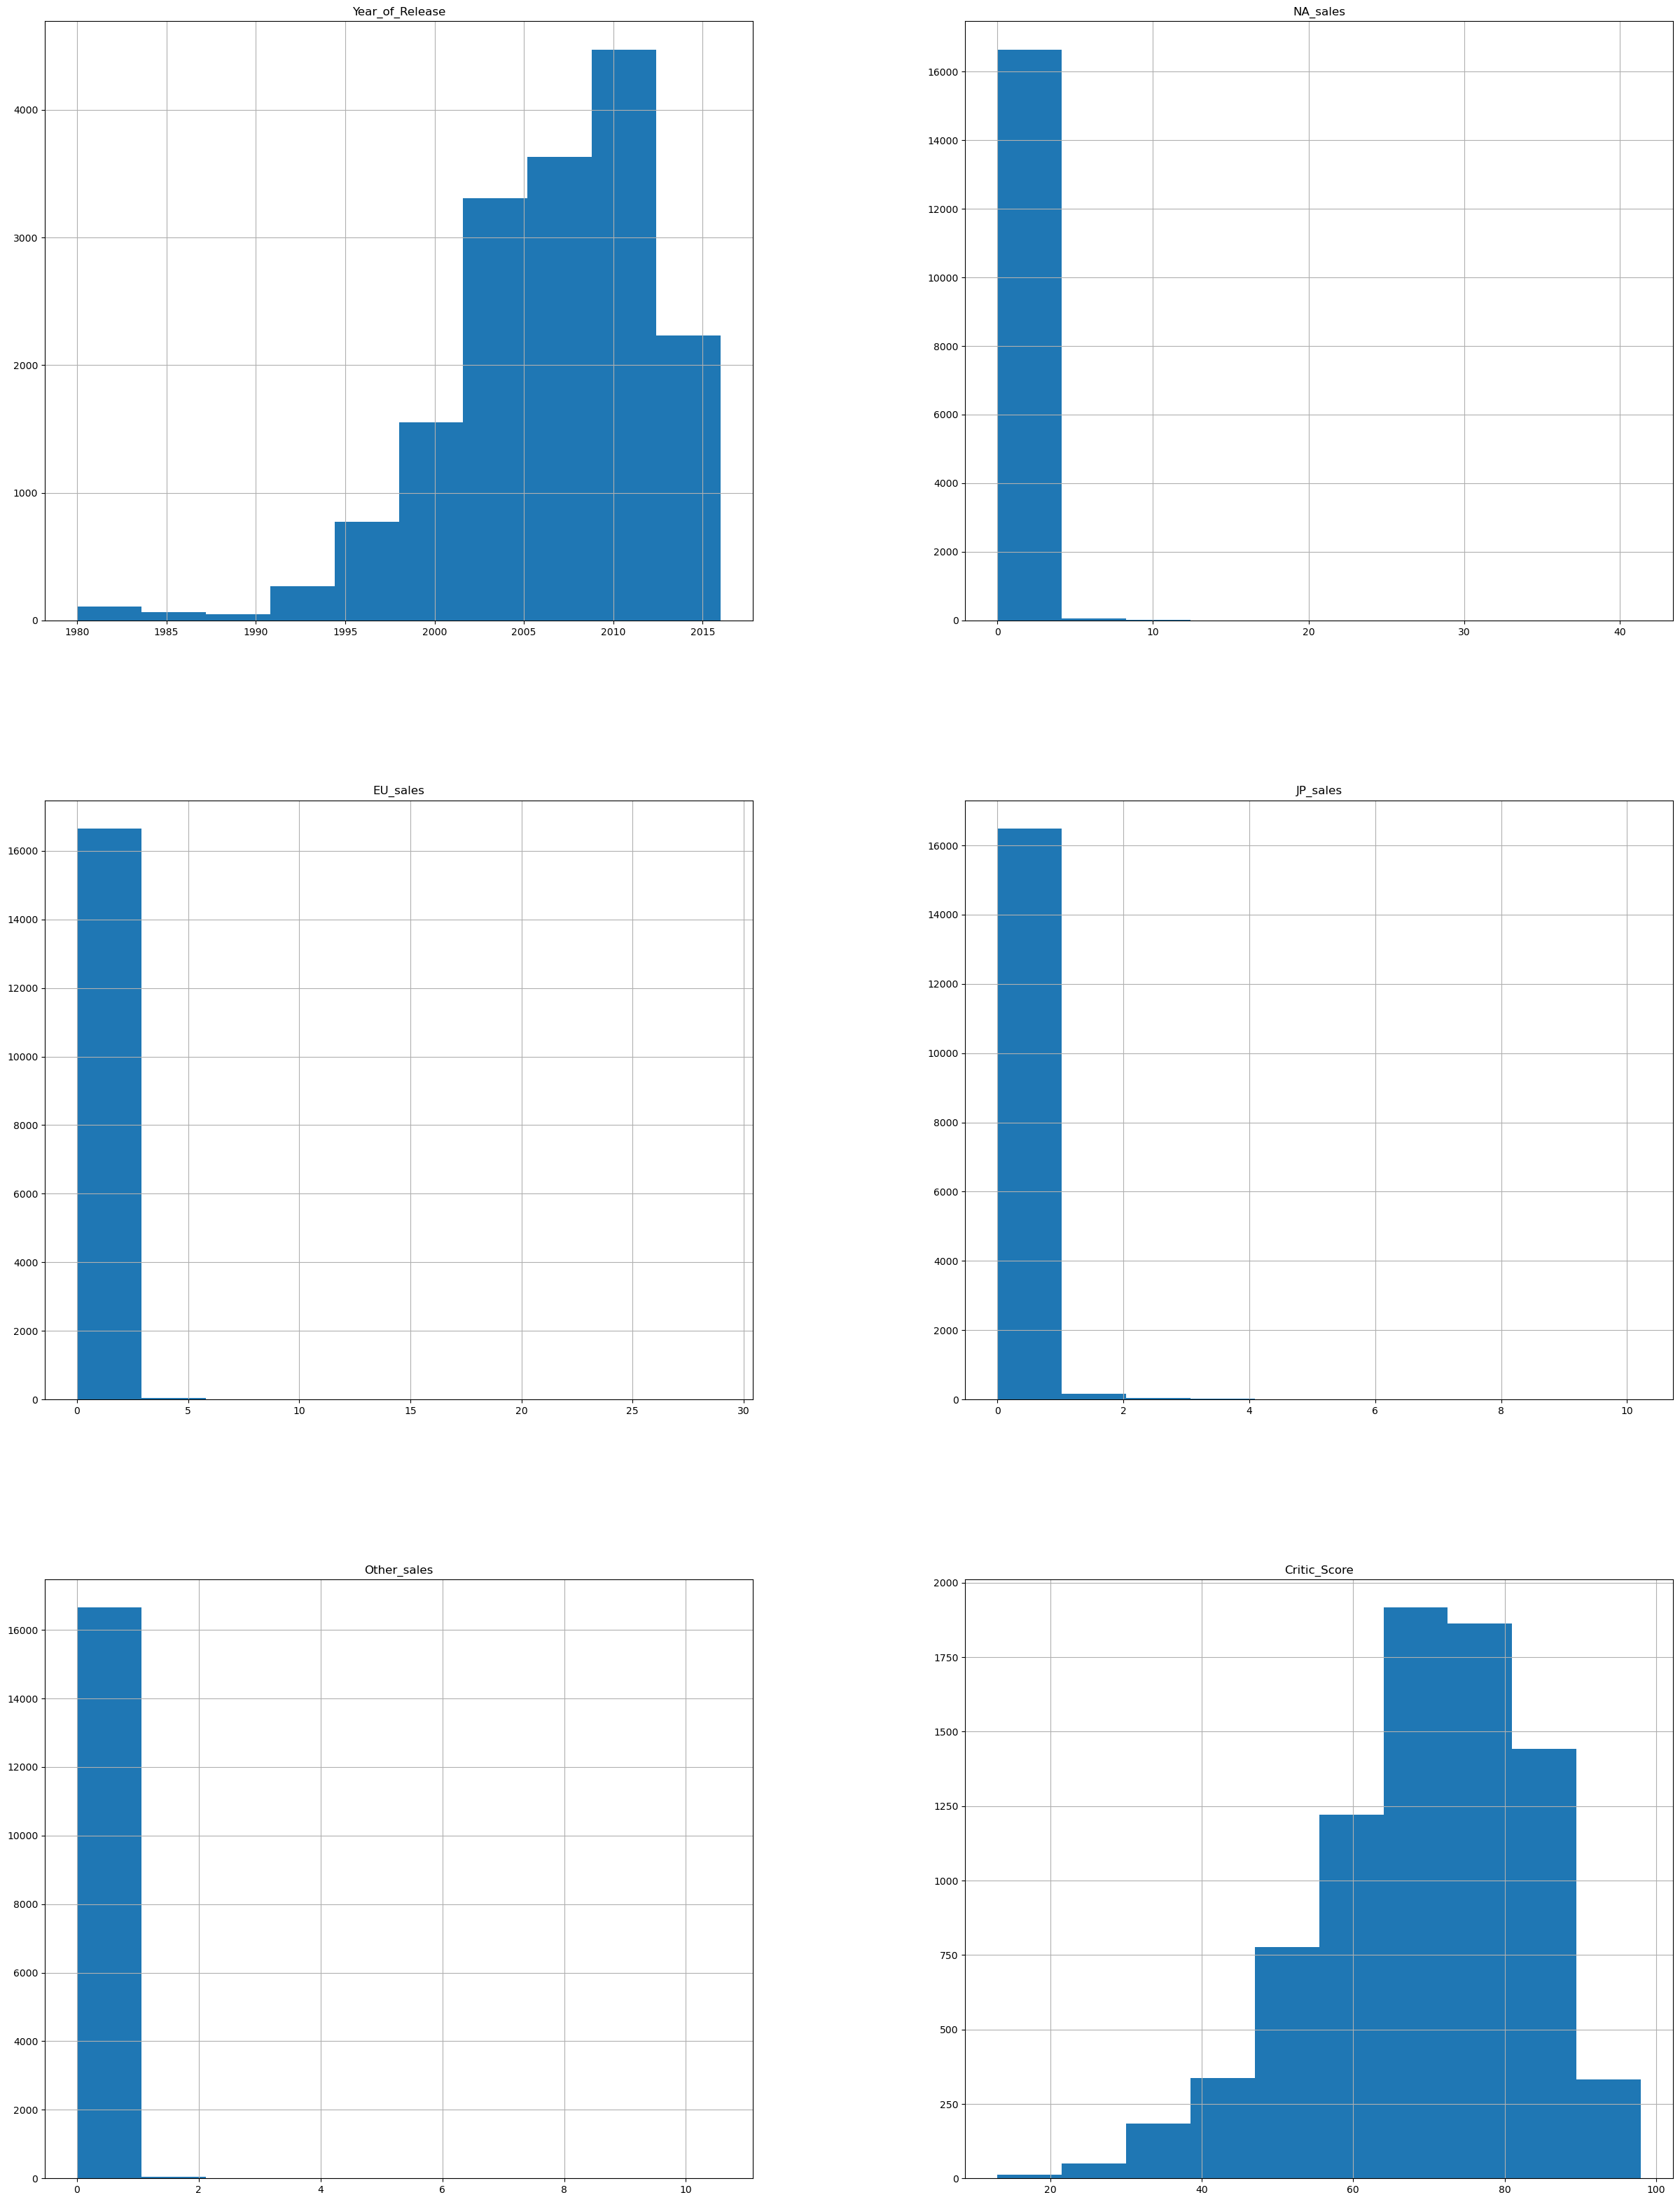

In [4]:
#построила гистограммы
data.hist(figsize=(30, 40))
plt.show()

In [5]:
#ищу дубликаты
data.duplicated().sum()

0

<font color='DarkBlue'><b>Комментарий ревьюера 2</b></font><br>
<font color='DarkGreen'>👌 Хорошо, теперь правильно. 👍</font>

###  Подготовим данные

#### Замените названия столбцов (приведите к нижнему регистру)

In [6]:
#привела столюцы к нижнему регистру
data.columns = data.columns.str.lower()

#### Обработайте пропуски при необходимости:

In [7]:
#вывела таблицу с пропусками в %
pd.DataFrame(round(data.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Мы видим, что всего 2% пропусков в столбце name  и 2 шт. в year_of_release ,заменить пропуски не получится, поэтому просто удалим строки. Нужно обработать и другие пропуски. Решила, что в столбцах critic_score и user_score заменю на 1000, чтобы понимать, что это выброс и не использовать в исследовании.

In [8]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [9]:
data[data['user_score'].isna()].head() 


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [10]:
data = data.dropna(subset=['year_of_release'])
data = data.dropna(subset=['name'])
data = data.reset_index(drop=True)

In [11]:
#пропуски заменяю на 1000
data.loc[data['critic_score'].isna(), 'critic_score'] = -50
data.loc[data['user_score'].isna(), 'user_score'] = -50
data.loc[data['user_score'] == 'tbd', 'user_score'] = -50

#проверяем количество пропусков после удаления
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

In [12]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,7.767696
std,5.875525,0.818378,0.506716,0.311100,0.188005,60.259442
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-50.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-50.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-50.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


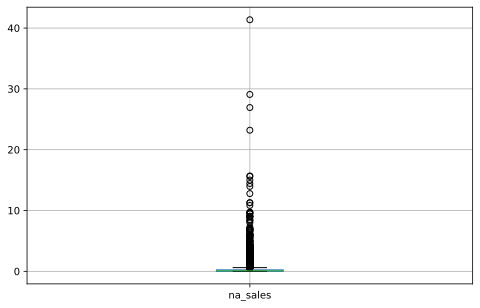

In [13]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5
import pandas as pd

data.boxplot(column=['na_sales'])
plt.show()

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [15]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [16]:
data['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

##### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [17]:
data['all_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-50.0,-50,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-50.0,-50,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-50.0,-50,NaN,0.01
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-50.0,-50,NaN,0.01
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-50.0,-50,NaN,0.01
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-50.0,-50,NaN,0.01


#### Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать

In [18]:
len(data.loc[(data['user_score'] == 'tbd')])

0

In [19]:
#заменяю пропуски в столбце rating - N/A (неизвестно)
data.loc[data['rating'].isnull(), 'rating'] = 'N/A'

In [20]:
data.groupby('year_of_release')['user_score'].count()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: user_score, dtype: int64

**tbd** - означает To Be Determined (будет определено), скорее всего рейтинг пока еще не определен. 

#### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему.

Теперь мне нужно найти уникальные значения, чтобы в случае чего удалить неявные дубликаты и заменить названия платформ для более удобного формата

In [21]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [22]:
data['rating'].unique()

array(['E', 'N/A', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: float64(7), object(5)
memory usage: 1.5+ MB


In [24]:
#меняю в нужные типы данных
data['year_of_release'] = data['year_of_release'].astype('Int64') 
data['user_score'] = data['user_score'].astype(float)

data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-50.0,-50.0,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-50.0,-50.0,N/A,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-50.0,-50.0,N/A,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-50.0,-50.0,N/A,28.31


Преобразовала все численные данные в формат float и int, это мне нужно для дальнеших исследований и визуализации. Пропуски были в столбцах user_score и critic_score. В столбце critic_score пропуски могут быть связаны с тем, пользователи и критики просто не оценили игры, либо игры новые и рейтинг не успел сформироваться, **tbd** - означает To Be Determined (будет определено), скорее всего рейтинг пока еще не определен. В стобце name есть пропуски скорее всего из-за того, что забыли при вводе указать название игры.

In [25]:
# Посмотрим, что у нас осталось
temp = data.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().sum()/len(temp)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  all_sales        16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

### Проведите исследовательский анализ данных

#### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [26]:
data_years = pd.pivot_table(data, index='year_of_release', values='name', aggfunc='count')
data_years.columns = ['games_count']
data_years

,games_count
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


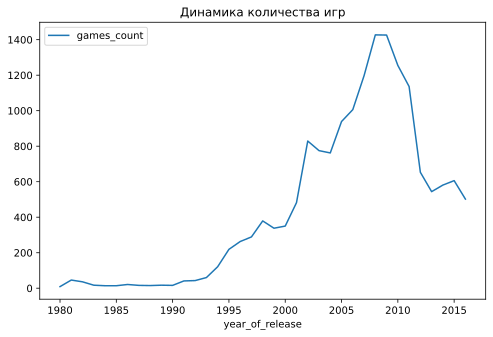

In [27]:
data_years.plot()
plt.title('Динамика количества игр')
plt.show()

Рейтинг Entertainment Software Rating Board (ESRB) появился только в 1994 году, игр, выпущенных до 1994,очень мало, поэтому я эти строки удаляю.

In [28]:
#удаляю строки, где year_of_release < 1993 года
data = data[data['year_of_release'] > 1993]
data = data.reset_index(drop=True)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
3,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-50.0,-50.0,N/A,31.38
4,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
...,...,...,...,...,...,...,...,...,...,...,...,...
16074,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-50.0,-50.0,N/A,0.01
16075,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-50.0,-50.0,N/A,0.01
16076,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-50.0,-50.0,N/A,0.01
16077,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,-50.0,-50.0,N/A,0.01


#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [29]:
platforms = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
platforms.head(7)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
PS       727.58
PS4      314.14
Name: all_sales, dtype: float64

Выбрала топ 7 платформ по продажам, 7 - потому что мы видим как модель платформы одной компании сменяет другую. 

In [30]:
import seaborn as sns
top7_platform = pd.pivot_table(data, values='all_sales', index='year_of_release', columns='platform',
aggfunc='sum')
top7_platform

platform,3DO,3DS,DC,DS,GB,GBA,GC,GEN,N64,NES,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1994,0.02,NaN,NaN,NaN,12.18,NaN,NaN,8.13,NaN,0.11,...,3.65,0.36,35.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.08,NaN,NaN,NaN,3.60,NaN,NaN,NaN,NaN,NaN,...,11.57,NaN,32.20,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,36.03,NaN,NaN,NaN,34.10,NaN,...,7.69,NaN,15.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,6.37,NaN,NaN,NaN,39.50,NaN,...,6.77,NaN,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,26.90,NaN,NaN,NaN,49.24,NaN,...,3.82,NaN,0.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,38.00,NaN,NaN,NaN,57.87,NaN,...,0.09,NaN,0.26,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,5.99,NaN,19.76,0.07,NaN,NaN,33.97,NaN,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN
2001,NaN,NaN,1.07,NaN,9.24,61.53,26.34,NaN,3.25,NaN,...,NaN,NaN,NaN,NaN,0.28,NaN,NaN,NaN,22.26,NaN
2002,NaN,NaN,0.29,NaN,NaN,74.16,51.81,NaN,0.08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.01,NaN


В этой сводной таблице мы можем увидеть, когда та или иная платформа появилась, либо стало неактуальна, например: 3DO был актуален до 1996 года, а 3DS только в 2011 году.

Также отчетливо видно, когда на рынок выходит новая модель платформы, то предыдущее поколение становится неактуальным, например: у PS суммарные продажи в 1999 году были 144.53 млн, а с выходом PS2 в 2000 году продажи PS сильно снизились до 96.37 млн. проданных копий. 

PC же актуален всегда, продажи были во все анализируемые года.

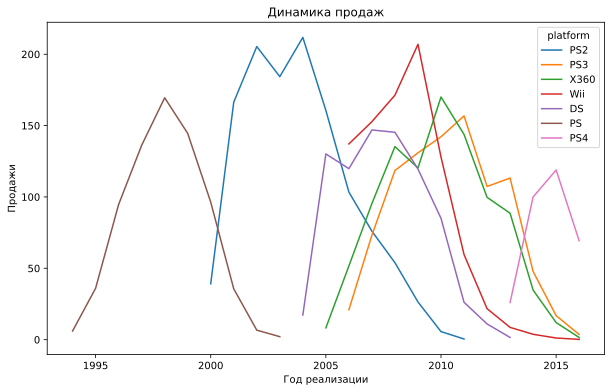

In [31]:
top7_platform = top7_platform[['PS2','PS3','X360','Wii','DS','PS','PS4']]
top7_platform.plot(figsize=(10,6))
plt.title('Динамика продаж')
plt.xlabel('Год реализации')
plt.ylabel('Продажи')
plt.show()

На графике видно на примере PS и Nintendo, как одна более новая модель сменяет своего предшественника. Если судить по самым продаваемым платформам, то нужно в среднем лет 7-10, чтобы одна модель сменила другую.  

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

На основе предыдущих исследований, я думаю логичнее взять период за анализ с 2012-2016 года, т.к. до 2012г. каждый год выходило более 1100 игр, а с 2012 мы видим спад. С 2012 по 2016 г. выпускалось в среднем от 500 до 700 игр. 

**Не учитываю в работе данные за предыдущие годы**

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

In [35]:
data.groupby('platform')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DO,3.0,0.033333,0.023094,0.02,0.0200,0.020,0.0400,0.06
3DS,512.0,0.503535,1.441271,0.01,0.0500,0.120,0.3325,14.60
DC,52.0,0.306731,0.468660,0.02,0.0775,0.135,0.2975,2.41
DS,2120.0,0.378660,1.436359,0.01,0.0500,0.110,0.2700,29.80
GB,67.0,2.269851,4.959833,0.07,0.2750,0.890,2.0550,31.38
GBA,811.0,0.385795,0.899654,0.01,0.0550,0.160,0.3900,15.84
GC,542.0,0.362970,0.693974,0.01,0.0600,0.150,0.3675,7.06
GEN,12.0,0.677500,0.742993,0.03,0.0700,0.200,1.3600,1.82
N64,316.0,0.689905,1.322189,0.01,0.1300,0.270,0.6000,11.90


In [36]:
data_top5_platform = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False)
data_top5_platform.head(5)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.76
Name: all_sales, dtype: float64

In [37]:
data_top5_platform = data[data['platform'].isin(['XOne','X360','PS3','Wii','3DS'])]
data_top5_platform['platform'].value_counts()

PS3     1306
Wii     1286
X360    1232
3DS      512
XOne     247
Name: platform, dtype: int64

(0.0, 2.5)

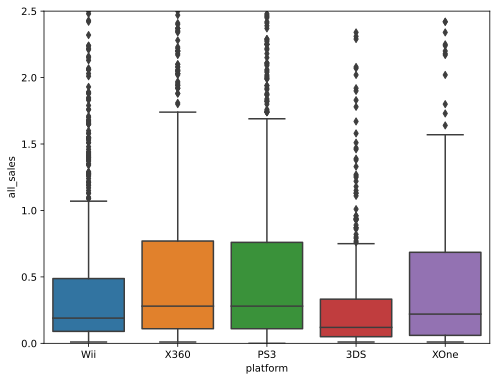

In [38]:
plt.figure(figsize=(8,6))

ax = sns.boxplot(x='platform', y='all_sales', data=data_top5_platform)
ax.set_ylim(0, 2.5)

In [40]:
data.groupby('platform')['critic_score'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DO,3.0,-50.000000,0.000000,-50.0,-50.0,-50.0,-50.0,-50.0
3DS,512.0,-12.015625,55.347008,-50.0,-50.0,-50.0,58.0,92.0
DC,52.0,-13.019231,61.591790,-50.0,-50.0,-50.0,80.0,98.0
DS,2120.0,-12.018868,54.220545,-50.0,-50.0,-50.0,56.0,93.0
GB,67.0,-50.000000,0.000000,-50.0,-50.0,-50.0,-50.0,-50.0
GBA,811.0,12.199753,59.387924,-50.0,-50.0,44.0,70.0,95.0
GC,542.0,46.431734,48.822228,-50.0,49.0,66.0,77.0,97.0
GEN,12.0,-50.000000,0.000000,-50.0,-50.0,-50.0,-50.0,-50.0
N64,316.0,-50.000000,0.000000,-50.0,-50.0,-50.0,-50.0,-50.0


In [41]:
data['critic_score'].value_counts()

-50.0    8099
 70.0     252
 71.0     248
 75.0     240
 80.0     235
         ... 
 20.0       3
 29.0       3
 21.0       1
 17.0       1
 13.0       1
Name: critic_score, Length: 82, dtype: int64

**Вывод:**

Подготовила ящик с усами за анализируемый период по топ5 по продажам, видим, что у всех разная медиана. Самые продаваемые платформы с 2012 по 2016 года - PS4, PS3, X360, 3DS, XOne.


#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [42]:
#произвела фильтрацию по нужно платформе и отзывам пользователей без заглушек
PS3 = data.query('platform == "PS3"')
PS3_user_score = PS3.query('user_score != -50')
#считаем коэффициент Пирсона
PS3_user_score['user_score'].corr(PS3_user_score['all_sales'])

0.12841562938563025

In [46]:

print(len(data.query('user_score != -50')))
print(len(data.query('critic_score != -50')))
print(len(data.query('user_score != - 50 and critic_score != -50')))

7460
7980
6891


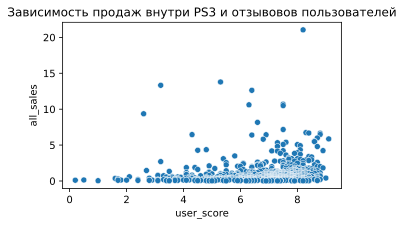

In [47]:
#строю диаграмму рассеяния по отзывам пользователей и продажам
plt.figure(figsize=(5,3))
sns.scatterplot(x='user_score', y='all_sales', data=PS3_user_score)
plt.title('Зависимость продаж внутри PS3 и отзывовов пользователей')
plt.show()

In [48]:
#произвела фильтрацию по  отзывам критиков без заглушек
PS3_critic_score = PS3.query('critic_score != -50')
#считаем коэффициент Пирсона
PS3_critic_score['critic_score'].corr(PS3_critic_score['all_sales'])

0.4327589578997139

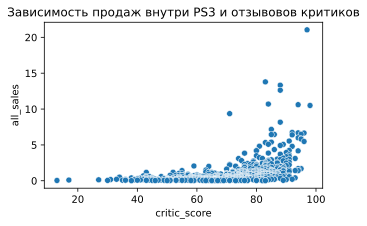

In [49]:
#строю диаграмму рассеяния по отзывам критиков и продажам
plt.figure(figsize=(5,3))
sns.scatterplot(x='critic_score', y='all_sales', data=PS3_critic_score)
plt.title('Зависимость продаж внутри PS3 и отзывовов критиков')
plt.show()

На продажи PS3 отзывы пользователей не влияют, корреляция отрицательная. Между отзывами пользователей и продажами слабовыраженная.

#### Соотнесите выводы с продажами игр на других платформах.

In [50]:
data['platform'].value_counts()

PS2     2127
DS      2120
PS3     1306
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       950
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SAT      173
WiiU     147
SNES     144
GB        67
DC        52
GEN       12
NG        10
WS         6
SCD        5
3DO        3
TG16       2
NES        1
PCFX       1
Name: platform, dtype: int64

In [51]:
#фильтрую датасет по наименованию платформы
PS4 = data.query('platform == "PS4"')
#убираю заглушки
PS4_user_score = PS4.query('user_score != -50')
PS4_critic_score = PS4.query('critic_score != -50')

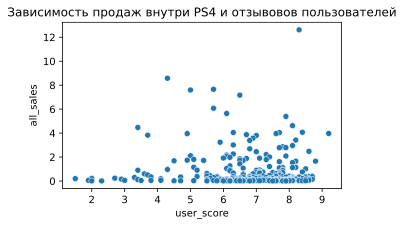

Коэффициент Пирсона: -0.03195711020455643


In [52]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='user_score', y='all_sales', data=PS4_user_score)
plt.title('Зависимость продаж внутри PS4 и отзывовов пользователей')
plt.show()
print('Коэффициент Пирсона:', PS4_user_score['user_score'].corr(PS4_user_score['all_sales']))

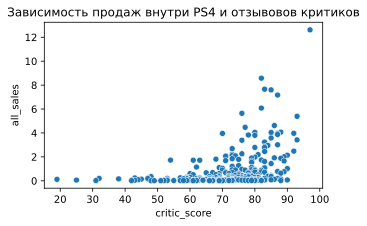

Коэффициент Пирсона: 0.4065679020617816


In [53]:
#строю диаграмму рассеяния по отзывам критиков и продажам
plt.figure(figsize=(5,3))
sns.scatterplot(x='critic_score', y='all_sales', data=PS4_critic_score)
plt.title('Зависимость продаж внутри PS4 и отзывовов критиков')
plt.show()
print('Коэффициент Пирсона:', PS4_critic_score['critic_score'].corr(PS4_critic_score['all_sales']))

**Вывод:** Отзывы пользователей никак не влияют на продажи игр на платформе PS4, отзывы критиков влияние же имеют.

In [54]:
X360 = data.query('platform == "X360"')
X360_user_score = X360.query('user_score != -50')
X360_critic_score = X360.query('critic_score != -50')

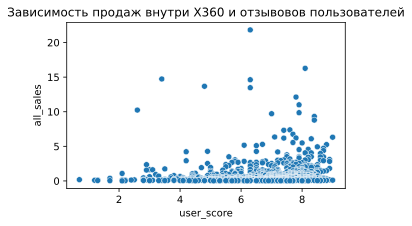

Коэффициент Пирсона: 0.11418661214018043


In [55]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='user_score', y='all_sales', data=X360_user_score)
plt.title('Зависимость продаж внутри Х360 и отзывовов пользователей')
plt.show()
print('Коэффициент Пирсона:', X360_user_score['user_score'].corr(X360_user_score['all_sales']))

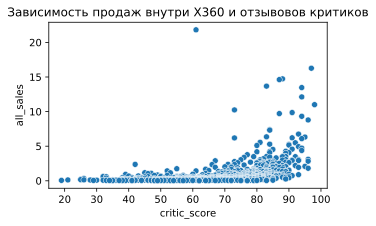

Коэффициент Пирсона: 0.3928658925400702


In [56]:
#строю диаграмму рассеяния по отзывам критиков и продажам
plt.figure(figsize=(5,3))
sns.scatterplot(x='critic_score', y='all_sales', data=X360_critic_score)
plt.title('Зависимость продаж внутри Х360 и отзывовов критиков')
plt.show()
print('Коэффициент Пирсона:', X360_critic_score['critic_score'].corr(X360_critic_score['all_sales']))

**Вывод:** Отзывы пользователей имеют славыраженное влияние на продажи игр на платформе Х360, отзывы критиков имеют влияние чуть сильнее.

In [57]:
X360 = data.query('platform == "X360"')
X360_user_score = X360.query('user_score != -50')
X360_critic_score = X360.query('critic_score != -50')

In [58]:
DS = data.query('platform == "3DS"')
DS_user_score = DS.query('user_score != -50')
DS_critic_score = DS.query('critic_score != -50')

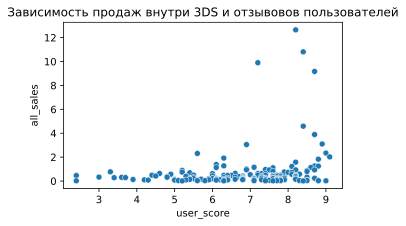

Коэффициент Пирсона: 0.22207843643390876


In [59]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='user_score', y='all_sales', data=DS_user_score)
plt.title('Зависимость продаж внутри 3DS и отзывовов пользователей')
plt.show()
print('Коэффициент Пирсона:', DS_user_score['user_score'].corr(DS_user_score['all_sales']))

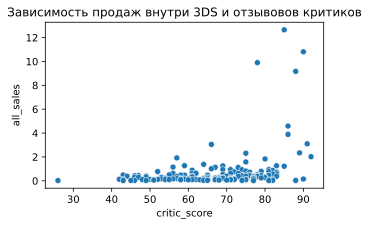

Коэффициент Пирсона: 0.34873973059848346


In [60]:
#строю диаграмму рассеяния по отзывам критиков и продажам
plt.figure(figsize=(5,3))
sns.scatterplot(x='critic_score', y='all_sales', data=DS_critic_score)
plt.title('Зависимость продаж внутри 3DS и отзывовов критиков')
plt.show()
print('Коэффициент Пирсона:', DS_critic_score['critic_score'].corr(DS_critic_score['all_sales']))

**Вывод:** Отзывы пользователей имеют славыраженное влияние на продажи игр на платформе 3DS, отзывы критиков имеют влияние чуть сильнее.

In [61]:
XOne = data.query('platform == "XOne"')
XOne_user_score = XOne.query('user_score != -50')
XOne_critic_score = XOne.query('critic_score != -50')

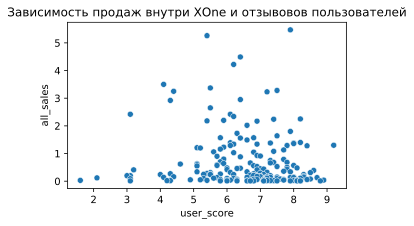

Коэффициент Пирсона: -0.06892505328279416


In [62]:
plt.figure(figsize=(5,3))
sns.scatterplot(x='user_score', y='all_sales', data=XOne_user_score)
plt.title('Зависимость продаж внутри ХOne и отзывовов пользователей')
plt.show()
print('Коэффициент Пирсона:', XOne_user_score['user_score'].corr(XOne_user_score['all_sales']))

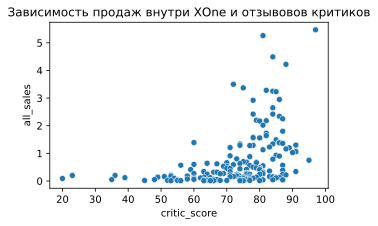

Коэффициент Пирсона: 0.4169983280084017


In [63]:
#строю диаграмму рассеяния по отзывам критиков и продажам
plt.figure(figsize=(5,3))
sns.scatterplot(x='critic_score', y='all_sales', data=XOne_critic_score)
plt.title('Зависимость продаж внутри ХOne и отзывовов критиков')
plt.show()
print('Коэффициент Пирсона:', XOne_critic_score['critic_score'].corr(XOne_critic_score['all_sales']))

**Вывод:** Отзывы пользователей не имеют влияния на продажи игр на платформе XOne, отзывы критиков же влияют на продажи.

**Вывод:** Заметила, что в целом на продажи практически не влияют отзывы пользователей по всем анализируемым платформам, но отзывы критиков, пусть и не сильное, но влияние же имеют.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [64]:
top_genre = data.pivot_table(index='genre', values='all_sales', aggfunc=['median','sum', 'count'])
top_genre.columns = ['median', 'sum', 'count']
top_genre

,median,sum,count
genre,,,
Action,0.18,1646.62,3226
Adventure,0.05,213.99,1284
Fighting,0.20,411.05,814
Misc,0.16,776.53,1707
Platform,0.24,640.59,819
Puzzle,0.09,159.90,536
Racing,0.18,694.59,1211
Role-Playing,0.18,895.60,1451
Shooter,0.23,976.24,1258


In [65]:
data.groupby('genre')['all_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
Action,3226.0,0.510422,1.153083,0.01,0.06,0.18,0.4800,21.05
Adventure,1284.0,0.166659,0.383323,0.01,0.02,0.05,0.1500,5.55
Fighting,814.0,0.504975,0.922829,0.01,0.08,0.20,0.5300,12.84
Misc,1707.0,0.454909,1.315069,0.01,0.06,0.16,0.3900,28.91
Platform,819.0,0.782161,1.959275,0.01,0.09,0.24,0.6500,29.80
Puzzle,536.0,0.298321,0.836098,0.01,0.04,0.09,0.2425,15.28
Racing,1211.0,0.573567,1.656578,0.00,0.07,0.18,0.5200,35.52
Role-Playing,1451.0,0.617229,1.728954,0.01,0.07,0.18,0.5050,31.38
Shooter,1258.0,0.776025,1.682380,0.01,0.08,0.23,0.7000,14.73


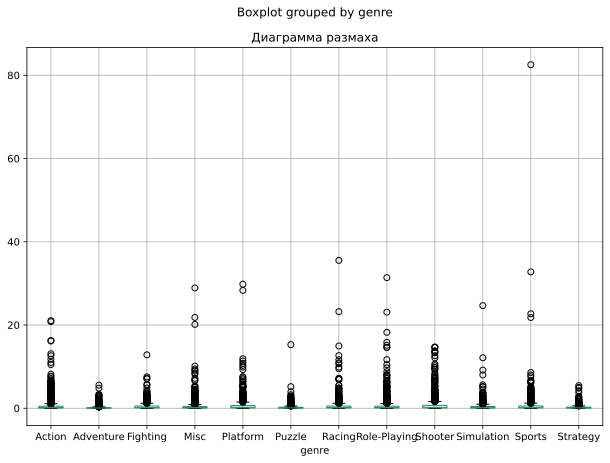

In [66]:
data.boxplot(column='all_sales', by='genre', figsize=(10,7))
plt.title('Диаграмма размаха')
plt.show()

Самый популярный жанр Action, очевидно, что в этом жанре и самое большое количество игр, но также присутствуют выбросы, вероятно, были игры, которые выстрелили и имели очень высокие продажи. Также третий квартиль намного меньше, чем у Shooter, то есть жанр не стабилен и у него есть много провальных игр.

Самая малопопулярный жанр это Puzzle, по нему малое количество игр выпускается, мало выбросов, это говорит о том, что и очень прибыльных игр в этом жанре нет.

А вот в жанре Shooter, Sports таких выбросов меньше, это говорит о том, что жанр стабилен по максимальным продажам.

### Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP)**

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [67]:
data_na = data.pivot_table(index='platform', values=['na_sales','all_sales'], aggfunc='sum')
data_na['percent_na'] = round(data_na['na_sales']/data_na['all_sales']*100)
data_na.sort_values(by='na_sales',ascending=False).head()

,all_sales,na_sales,percent_na
platform,,,
X360,961.24,595.74,62.0
PS2,1233.56,572.92,46.0
Wii,891.18,486.87,55.0
PS3,931.34,390.13,42.0
DS,802.76,380.31,47.0


Видим, что наибольшую долю 59% имеет Xbox 360. Я думаю, что это связано с тем, что Xbox 360 это локальный производитель.

In [68]:
data_eu = data.pivot_table(index='platform', values=['eu_sales','all_sales'], aggfunc='sum')
data_eu['percent_eu'] = round(data_eu['eu_sales']/data_eu['all_sales']*100)
data_eu.sort_values(by='eu_sales',ascending=False).head()

,all_sales,eu_sales,percent_eu
platform,,,
PS2,1233.56,332.63,27.0
PS3,931.34,327.21,35.0
X360,961.24,268.32,28.0
Wii,891.18,258.32,29.0
PS,727.58,212.39,29.0


В Европе же наибольшую долю занимают Sony PlayStation 4 и Sony PlayStation 3, 45% и 36% соотвественно. Скорее всего это связано с тем, что на PS выходит больше экслюзивных игр.

In [69]:
data_jp = data.pivot_table(index='platform', values=['jp_sales', 'all_sales'], aggfunc='sum')
data_jp['percent_jp'] = round(data_jp['jp_sales']/data_jp['all_sales']*100)
data_jp.sort_values(by='jp_sales',ascending=False).head()

,all_sales,jp_sales,percent_jp
platform,,,
DS,802.76,175.00,22.0
PS,727.58,139.78,19.0
PS2,1233.56,137.54,11.0
3DS,257.81,100.62,39.0
PS3,931.34,79.41,9.0


Nintendo, Sony PlayStation - это компании, которые зародились в Японии, возможно с этим и связана их популярность в Японии.

#### Самые популярные жанры (топ-5). Поясните разницу.

In [70]:
gen_na = data.pivot_table(index='genre', values=['na_sales','all_sales'], aggfunc='sum').reset_index()
gen_na['percent_na'] = round(gen_na['na_sales']/gen_na['all_sales']*100)
gen_na.sort_values(by='percent_na',ascending=False).head()

,genre,all_sales,na_sales,percent_na
8,Shooter,976.24,531.30,54.0
4,Platform,640.59,333.71,52.0
10,Sports,1266.74,657.57,52.0
2,Fighting,411.05,208.11,51.0
3,Misc,776.53,393.92,51.0


В Северной Америке (США имею ввиду) в принципе закон разрешает хранить оружие и у них особое отношение к стрелялкам.

In [71]:
gen_eu = data.pivot_table(index='genre', values=['eu_sales', 'all_sales'], aggfunc='sum')
gen_eu['percent_eu'] = round(gen_eu['eu_sales']/gen_eu['all_sales']*100)
gen_eu.sort_values(by='percent_eu',ascending=False).head()

,all_sales,eu_sales,percent_eu
genre,,,
Racing,694.59,230.32,33.0
Shooter,976.24,310.80,32.0
Action,1646.62,503.47,31.0
Simulation,381.84,112.00,29.0
Sports,1266.74,367.90,29.0


В Европе большую долю продаж занимают гонки - 51%. Может быть это связано с тем, что самые топовые спорткары производятся именно там.

In [72]:
gen_jp = data.pivot_table(index='genre', values=['jp_sales','all_sales'], aggfunc='sum')
gen_jp['percent_jp'] = round(gen_jp['jp_sales']/gen_jp['all_sales']*100)
gen_jp.sort_values(by='percent_jp',ascending=False).head()

,all_sales,jp_sales,percent_jp
genre,,,
Role-Playing,895.60,321.40,36.0
Strategy,170.45,47.56,28.0
Adventure,213.99,46.55,22.0
Puzzle,159.90,35.10,22.0
Fighting,411.05,72.11,18.0


Из всех продаж, самую большую долю занимают пазлы. Я думаю, что это связано с тем, что именно в Японии придумали игру "судоку", да и в целом японцы любят интеллектуальные игры.

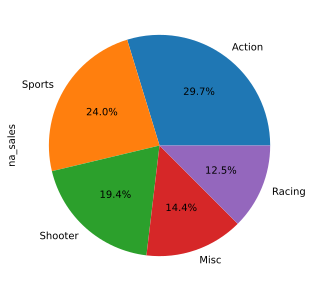

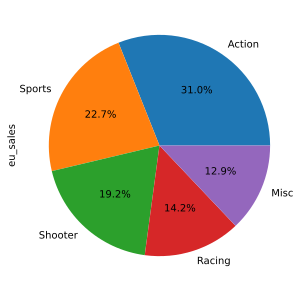

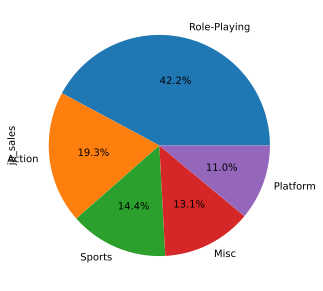

In [74]:
region = ['na_sales', 'eu_sales', 'jp_sales']
for i in region:
    data.pivot_table(index='genre', 
values = i, aggfunc='sum').sort_values(by=i, ascending=False).head().plot(kind='pie', subplots=True, legend=False, autopct='%1.1f%%')


На круговой диаграмме выделила еще раз продажи разных жанров игр по разным регионам.

    

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [75]:
rating_na = data.pivot_table(index='rating', values=['na_sales', 'all_sales'], aggfunc='sum').reset_index()
rating_na['percent_na'] = round(rating_na['na_sales']/rating_na['all_sales']*100)
rating_na.sort_values(by='na_sales',ascending=False).head()

,rating,all_sales,na_sales,percent_na
1,E,2407.61,1274.24,53.0
6,N/A,2242.75,902.99,40.0
8,T,1472.25,747.58,51.0
5,M,1462.51,742.87,51.0
2,E10+,640.95,345.50,54.0


Самые продаваемые игры с рейтингом М - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Но самую большую долю продаж занимают игры с рейтингом Е10+ - подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. 

In [76]:
rating_eu = data.pivot_table(index='rating', values=['eu_sales', 'all_sales'], aggfunc='sum').reset_index()
rating_eu['percent_eu'] = round(rating_eu['eu_sales']/rating_eu['all_sales']*100)
rating_eu.sort_values(by='eu_sales',ascending=False).head()

,rating,all_sales,eu_sales,percent_eu
1,E,2407.61,703.87,29.0
6,N/A,2242.75,551.33,25.0
5,M,1462.51,480.00,33.0
8,T,1472.25,420.99,29.0
2,E10+,640.95,183.33,29.0


Самые продаваемые игры с рейтингом М - подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Но самую большую долю продаж занимают игры с рейтингом Е - подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. 

In [77]:
rating_jp = data.pivot_table(index='rating', values=['jp_sales', 'all_sales'], aggfunc='sum').reset_index()
rating_jp['percent_jp'] = round(rating_jp['jp_sales']/rating_jp['all_sales']*100)
rating_jp.sort_values(by='jp_sales',ascending=False).head()

,rating,all_sales,jp_sales,percent_jp
6,N/A,2242.75,650.35,29.0
1,E,2407.61,197.96,8.0
8,T,1472.25,150.70,10.0
5,M,1462.51,63.58,4.0
2,E10+,640.95,40.20,6.0


В Японии свой отдельный формат рейтинга CERO. Поэтому большие продажи приходятся на N/A

### Проверьте гипотезы

#### Проверка гипотезы. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H_a: Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [78]:

data = data[data['user_score'] != -50]
# results = вызов метода для проверки гипотезы
results = st.ttest_ind(
    data[data['platform'] == 'XOne']['user_score'],
    data[data['platform'] == 'PC']['user_score'])
# alpha = задайте значение уровня значимости
alpha = .05
print('p-значение:', results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

p-значение: 9.379956219356064e-06
Отвергаем нулевую гипотезу


In [80]:
display(data.user_score.min())
display(data[data['platform'] == 'Xbox One']['user_score'])
data[data['platform'] == 'Personal Computer']['user_score']

0.0

Series([], Name: user_score, dtype: float64)

Series([], Name: user_score, dtype: float64)

Нет оснований отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

#### Проверка гипотез. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

H_0 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H_a Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [81]:

# results = вызов метода для проверки гипотезы
data = data[data['user_score'] != -50]
results = st.ttest_ind(
    data[data['genre'] == 'Sports']['user_score'],
    data[data['genre'] == 'Action']['user_score'])

alpha = .05
print('p-значение:', results.pvalue) # вывод значения p-value на экран 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") # условный оператор с выводом строки с ответом

p-значение: 0.06480928064420527
Не получилось отвергнуть нулевую гипотезу


Отвергаем нуделевую гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

- **Какой критерий применили для проверки гипотез и почему?**

В Python есть специальный метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind. Применила этот критерий потому что выборки друг от друга не зависят.

- **Как вы сформулировали нулевую и альтернативную гипотезы?**

Нулевая и альтернативная гипотеза должны быть взаимоисключающими, по такому принципу они были выбраны.

In [82]:

data[data['genre'] == 'Sports']['user_score'].mean(), data[data['genre'] == 'Action']['user_score'].mean()

(6.951433857539316, 7.058129175946549)

### Вывод

Мы провели исследование для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Нам были доступны исторические данные с 1980 года по 2016 год (неполный) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цель исследования:** Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для 2017 года.

**В ходе исследования было выполненно:**
- Изучила общую информацию;
- Привела столбцы к нижнему регистру;
- Обработала пропуски: заменила в столбце rating значение tbd на N/A (неизвестно), заменила пропуски в user_score и critic_score на выбивающиеся значения - 1000, чтобы в ходе исследования не использовать их. Не нужные строки удалила;
- Посчитала суммарные продажи и записала значения в новый столбец all_sales;
- Провела исследовательский анализ данных: посмотрела сколько игр выпускалось в разные года, не нужные мне года убрала из датафрейма, проанализировала продажи по разным платформам, странам, играм, изучила влияние отзывов пользователей и критиков на продажи, посмотрела на общее распределение игр по жанрам;
- Составила портрет пользователя для трех регионов (Северная Америка, Европа и Япония);
- Проверила две гипотезы.

**Вывод:**

Для анализа выбрала года 2012-2016, так в это время не было каких-то всплесков по продажам. В среднем одна платформа сменяет другую за 7-10 лет. Наиболее популярными и продаваемыми платформами были - Sony PlayStation 2, Sony PlayStation 3, Xbox 360, Nintendo Wii, Nintendo DS, Sony PlayStation, Sony PlayStation 4. 

Пиком по разработке и по выходу игр были 2006-2011 года, а с 2012 года в принципе все платформы падают в продажах и игр выходит все меньше. 

Я считаю, что наиболее перпективная платформа в 2017 году - Sony PlayStation 4. Самые прибыльные жанры будут Action, Shooter, Sports. В Японии Role-Playing. При том, что Shooter, Sports, Role-Playing являются более стабильными, в отличии от Acton. Поэтому именно на них и стоит делать ставку. Наиболее популярный рейтинг М, в Японии же рейтинговая система другая. Отзывы пользователей слабо либо вообще не влияют на продажи, чего не скажешь об отзывах критиков. Их отзывы определенно влияют на продажи. 
